In [1]:
from scipy.io import netcdf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import similarity_measures as sim
import calculations as calc
import plots
import numpy as np

In [2]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

In [3]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

In [4]:
metrics = [sim.pearson_correlation, sim.mutual_information, sim.transfer_entropy, sim.manhattan_distance]

In [5]:
metric_labels = ["Pearson's Correlation", "Mutual Information", "Transfer Entropy", "Manhattan Distance"]

In [6]:
similarities = []
for i, metric in enumerate(metrics):
    similarities.append(np.array(calc.calculate_series_similarity(u_l30, qbo_equator, 0, metric)))

n_metrics = len(metrics)

In [8]:
category = ["Similarities to QBO", "Histogram of similarity values", "Similarity values vs. Pearson's Correlation"]

C:\Users\tousp\anaconda3\envs\climate_similarity_measures\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


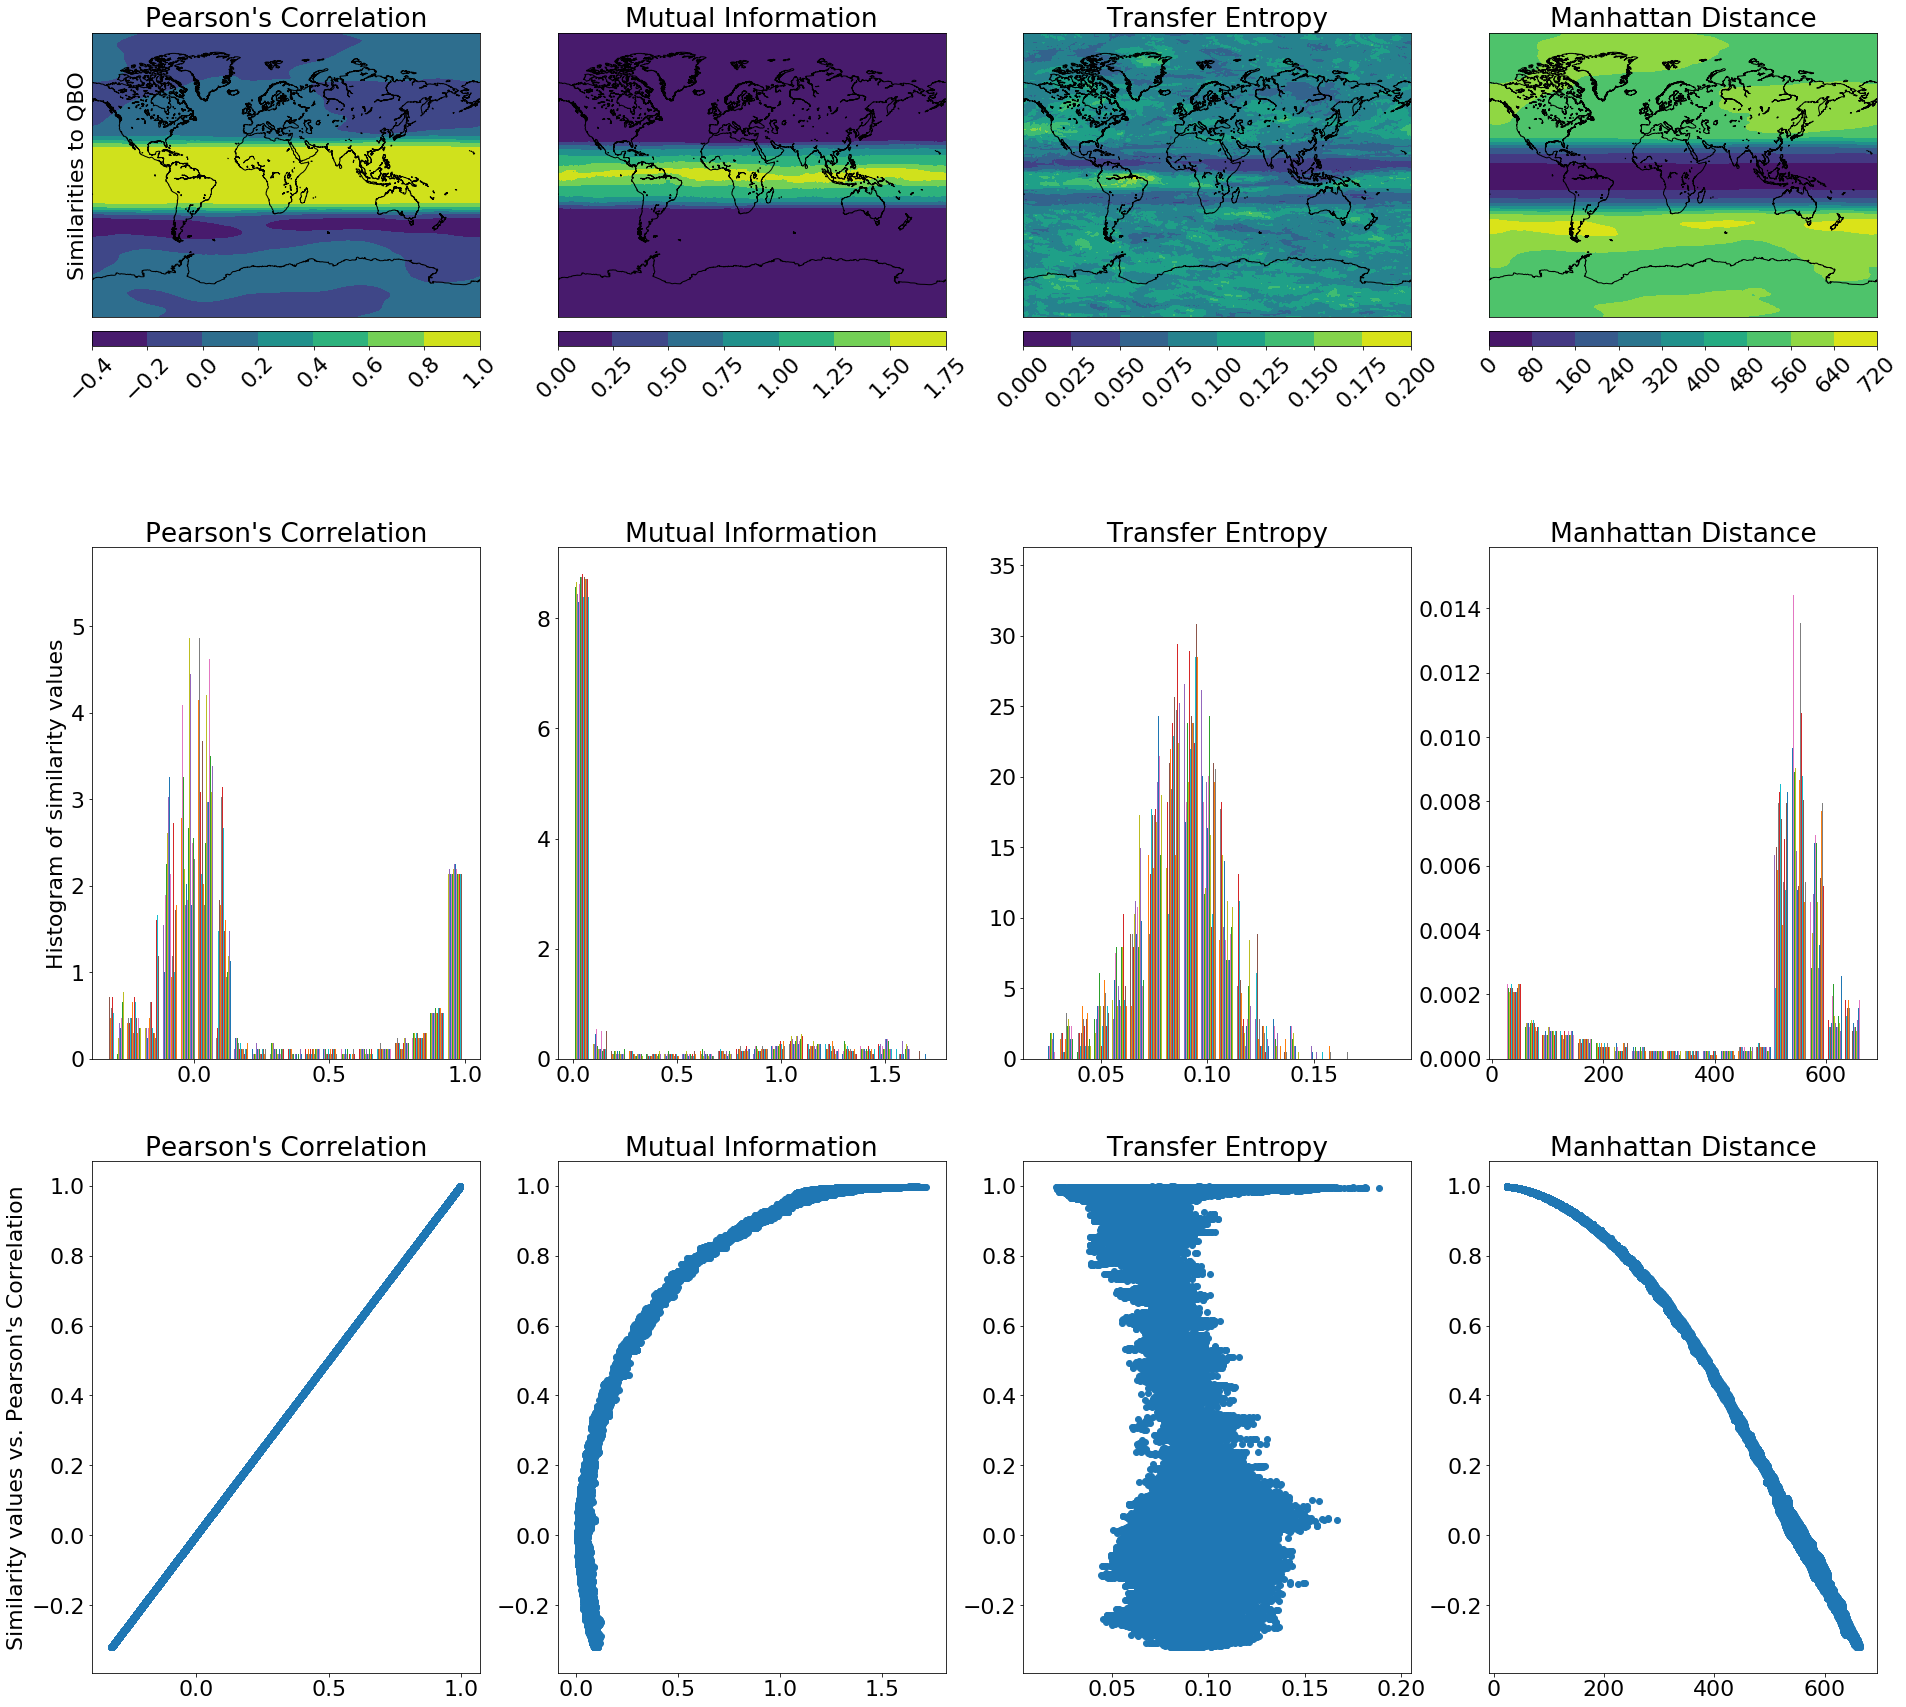

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=n_metrics, figsize=(8 * 4, 8 * n_metrics))

plt.rcParams.update({'font.size': 22})

for i, sim in enumerate(similarities):
    m = Basemap(projection='mill', lon_0=30, resolution='l', ax=ax[0][i])
    m.drawcoastlines()
    lons, lats = m.makegrid(512, 256)
    x, y = m(lons, lats)

    #Draw similarity
    cs = m.contourf(x, y, sim)
    cbar = m.colorbar(cs, location='bottom', pad="5%")
    cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=45)
    
for i, sim in enumerate(similarities):
    ax[1][i].hist(sim, bins=20, histtype="bar", density=1)

for i, metric_i in enumerate(metrics):
            ax[2][i].scatter(similarities[i], similarities[0])

for i, label in enumerate(metric_labels):
    for j in range(3):
        ax[j][i].set_title(label)
        ax[j][0].set_ylabel(category[j], rotation=90)

plt.show()